In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)
df.head(3) 

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [80]:
df_IN_DA = df[(df['job_title_short'] =='Data Analyst') & (df['job_country'] =='India')].copy()
df_IN_DA = df_IN_DA.dropna(subset='salary_year_avg')
df_IN_DA[['job_title_short','job_country','salary_year_avg']]
df_IN_DA = df_IN_DA.explode('job_skills')
df_IN_DA.head(7)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,python,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,sql,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,aws,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,azure,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,excel,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,jenkins,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,git,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."


In [81]:
# df_IN_DA.pivot_table(index='job_skills',columns='salary_year_avg',aggfunc='count',fill_value=0)
df_high_paid =df_IN_DA.groupby('job_skills').agg(
    median = ('salary_year_avg','median')
).sort_values(by='median',ascending=False).head(10)
df_high_paid

,median
job_skills,
pyspark,165000.0
linux,165000.0
gitlab,165000.0
mysql,165000.0
postgresql,165000.0
mongodb,163782.0
gdpr,163782.0
neo4j,163782.0
databricks,163782.0


In [82]:
df_high_demand = df_IN_DA.groupby('job_skills')['salary_year_avg'].count().sort_values(ascending=False).head(10)
df_high_demand = df_IN_DA.groupby('job_skills').agg(
    count = ('job_skills','size'),
    salary_median = ('salary_year_avg','median')
    ).sort_values(by='count',ascending=False).head(10)
df_high_demand = df_high_demand.sort_values(by='salary_median',ascending=False)
df_high_demand


,count,salary_median
job_skills,,
spark,11,111175.0
power bi,17,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


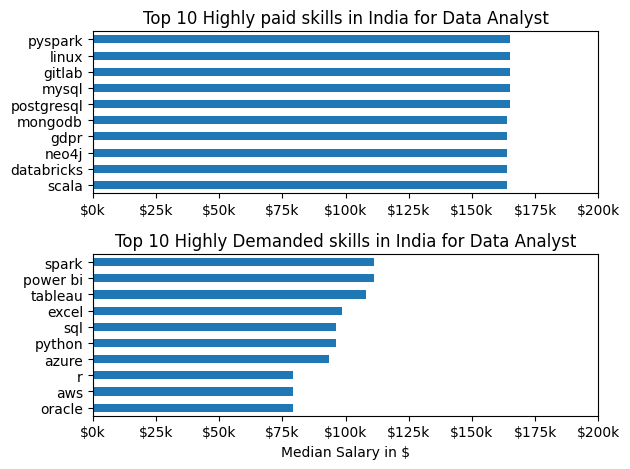

In [84]:
fig , ax = plt.subplots(2,1)

df_high_paid.plot(kind='barh',ax = ax[0],legend=False, ylabel='',title='Top 10 Highly paid skills in India for Data Analyst', xlim=(0,200_000))
ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos: f'${int(x/1000)}k'))


df_high_demand.plot(kind='barh', y='salary_median',ax = ax[1],legend=False, xlabel='Median Salary in $',ylabel='',title='Top 10 Highly Demanded skills in India for Data Analyst', xlim=(0,200_000))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos: f'${int(x/1000)}k'))
ax[1].invert_yaxis()

fig.tight_layout()
